#                            **About the Dataset**


This dataset consists of sales of a supermarket company in 3 different branches for 3 months.

Based on the data, it is observed that there are 1000 rows and 17 columns.

### **The dataset has the following attributes:**


Unit price - Price of each product

Quantity - Number of products purchased by customer

Tax - 5% tax fee for customer buying

Total - Total price including tax

Date - Date of purchase (Record available from January 2019-March 2019)

Time - Purchase time (10am to 9pm)

Payment - Payment used by customer for purchase (3 methods available:Cash,
                                                Credit card and Ewallet)

COGS - Cost of goods sold

Gross margin percentage - Gross margin percentage

Gross income - Gross income

Rating - Customer satisfication rating on their overall shopping experience     



# **Importing libraries**

Pandas : It has functions for analyzing, cleaning, exploring, and manipulating data.

Numpy : It is very useful to perform mathematical and statistical operations in Python.

sklearn_train_test : Splits arrays or matrices into random train and test subsets.

sklearn_LinearRegression : Performs Linear Regression

sklearn_mean_squared_error : To calculate MSE



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# **Data Preprocessing**

### **1. Loading the Dataset**

In [3]:
df = pd.read_csv('/content/SalesData_For_Analysis.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Trivendrum,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Bangalore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Trivendrum,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Trivendrum,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Trivendrum,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Changing the date format to 'dd-mm-yyyy'
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

# Final transformed 'Date' Column
print(df['Date'])

0      05-01-2019
1      08-03-2019
2      03-03-2019
3      27-01-2019
4      08-02-2019
          ...    
995    29-01-2019
996    02-03-2019
997    09-02-2019
998    22-02-2019
999    18-02-2019
Name: Date, Length: 1000, dtype: object


### **2.Data Cleaning**

In [6]:
# Checking null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no null/missing values in the dataset,hence needn't drop any row

# **EDA**

### **Univariate Analysis**

"Uni" means one and "variate" means variable, so in univariate analysis, there is only one dependable variable.

The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it.

This is done by representing data in form of Bar Charts,Histogram,Pie Chart,etc.

In [7]:
#importing necessary library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

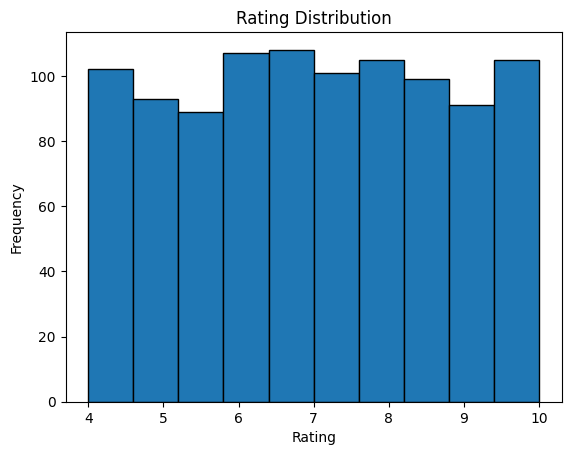

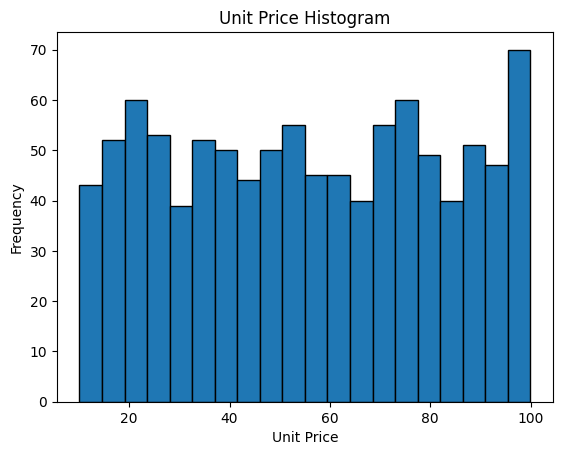

In [8]:
#This is Histogram of categorical value of Ratings and Unit Price
import matplotlib.pyplot as plt
plt.hist(df['Rating'], bins=10, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

df['Unit price'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Unit Price Histogram')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

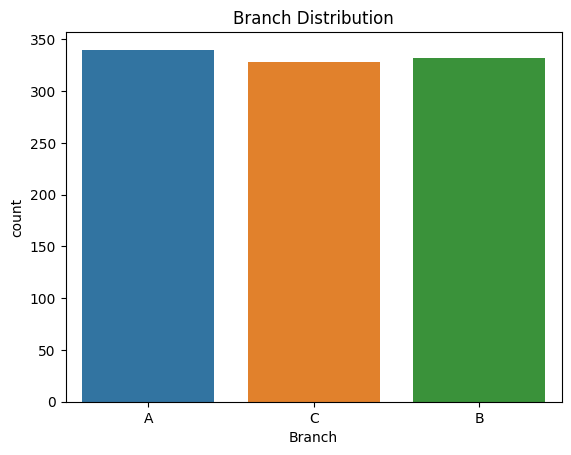

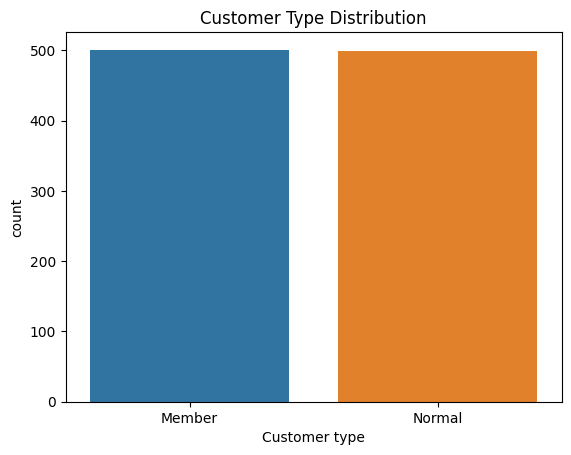

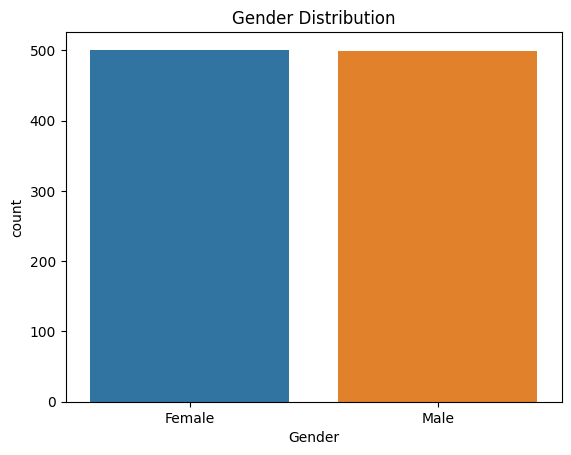

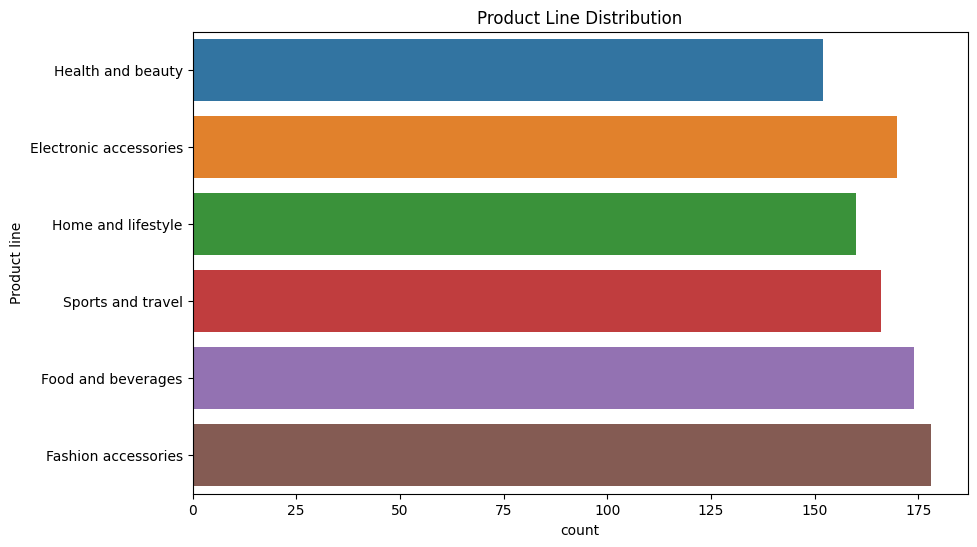

In [9]:
#Bar plot for categorical values like Branch,Customer Type,Gender,Product Line
sns.countplot(x='Branch', data=df)
plt.title('Branch Distribution')
plt.show()

sns.countplot(x='Customer type', data=df)
plt.title('Customer Type Distribution')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Product line', data=df)
plt.title('Product Line Distribution')
plt.show()

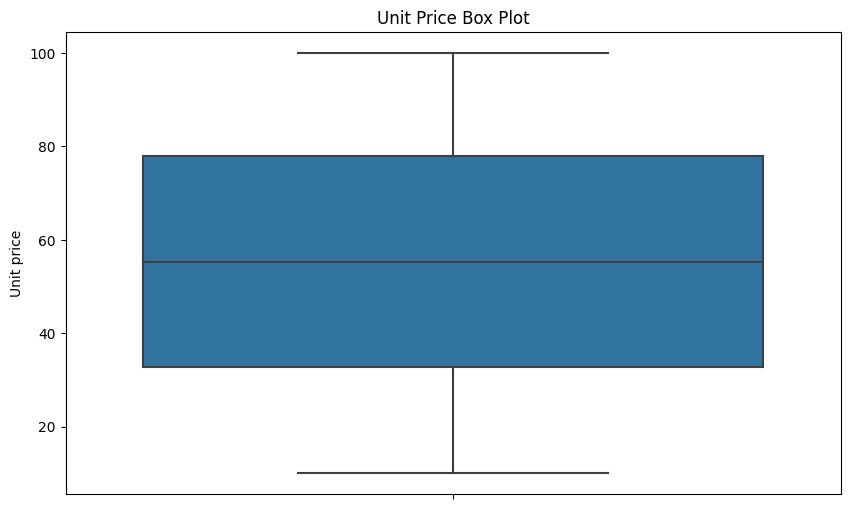

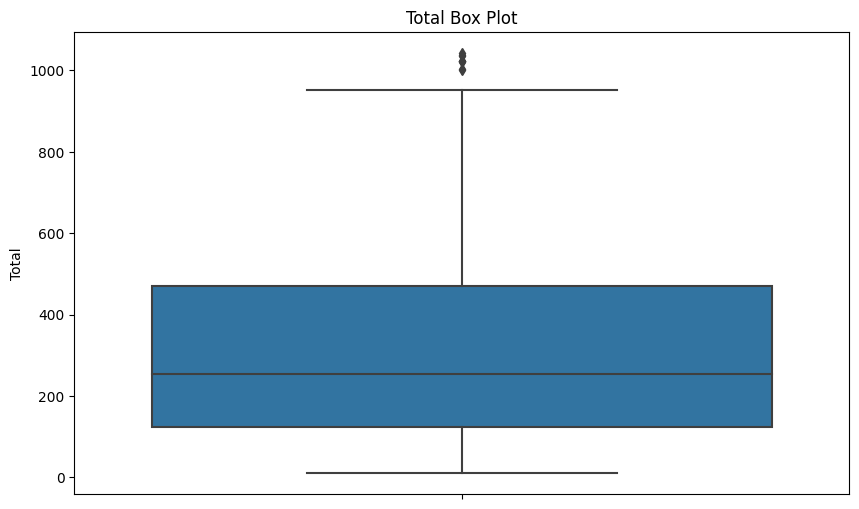

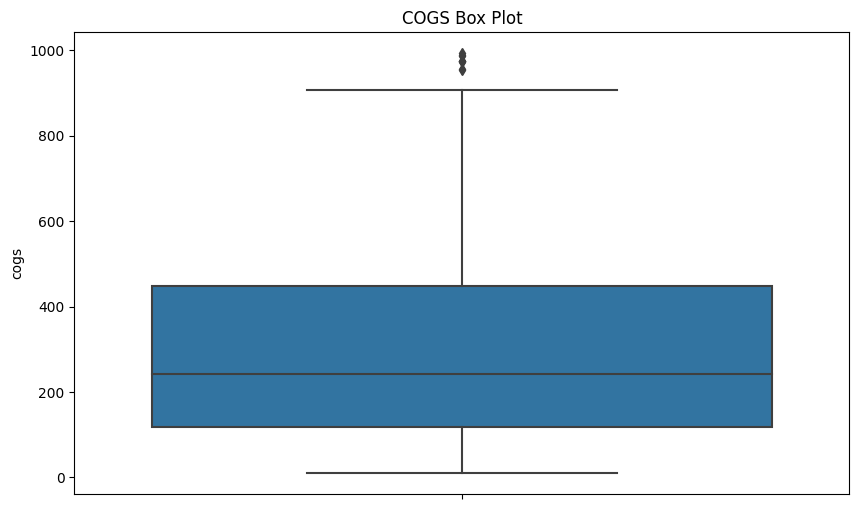

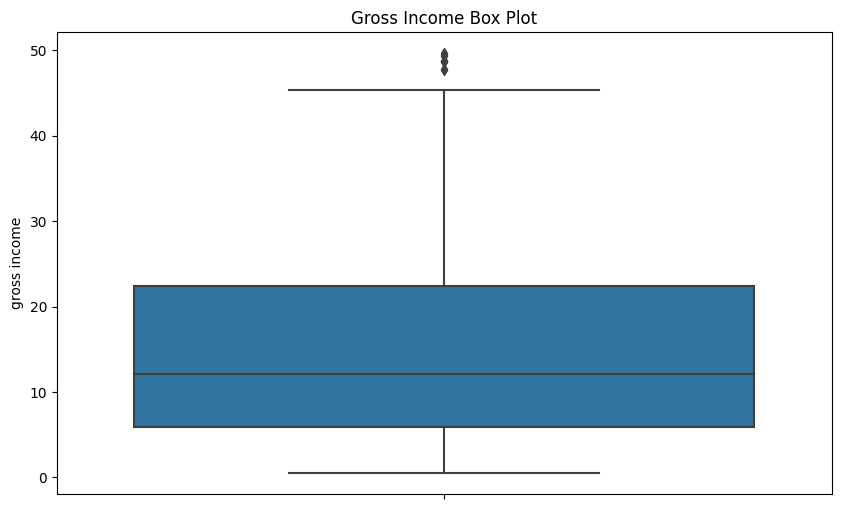

In [10]:
#Boxplot to determine outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='Unit price', data=df)
plt.title('Unit Price Box Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='Total', data=df)
plt.title('Total Box Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='cogs', data=df)
plt.title('COGS Box Plot')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='gross income', data=df)
plt.title('Gross Income Box Plot')
plt.show()


### **Multivariate Analysis**

Multivariate analysis is required when more than two variables have to be analyzed simultaneously.

Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc.

<ipython-input-11-6fb1df94d5b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


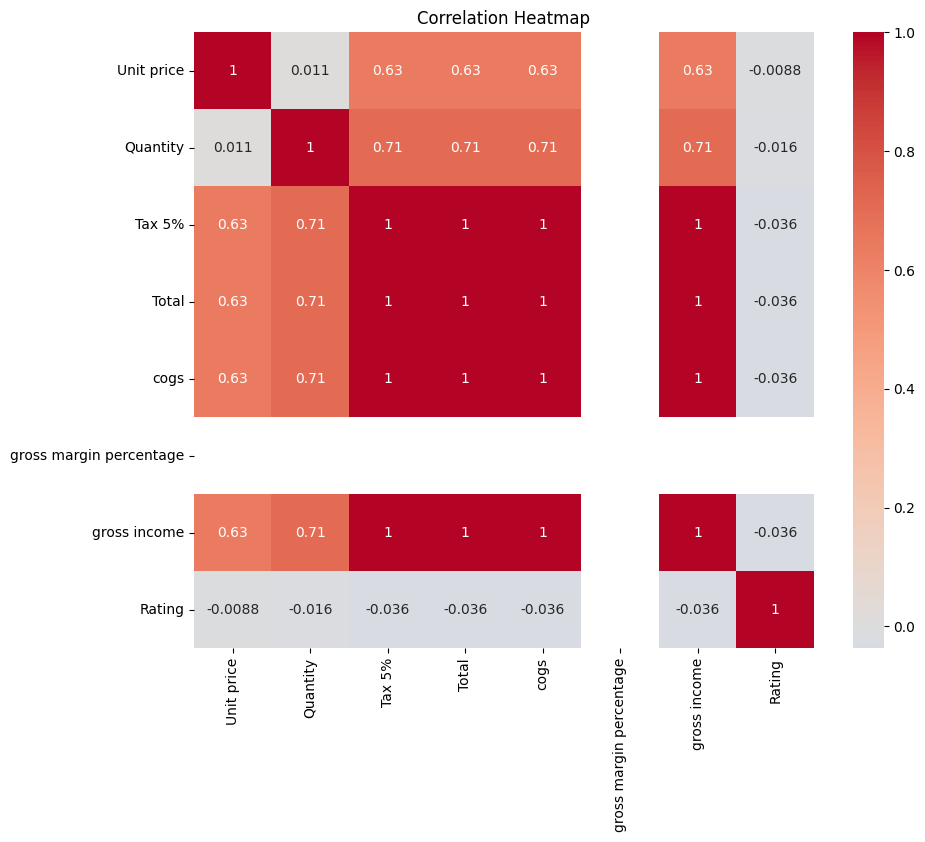

In [11]:
#Correlation Heatmap:to visualize the pairwise correlations between numerical variables in the dataset.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


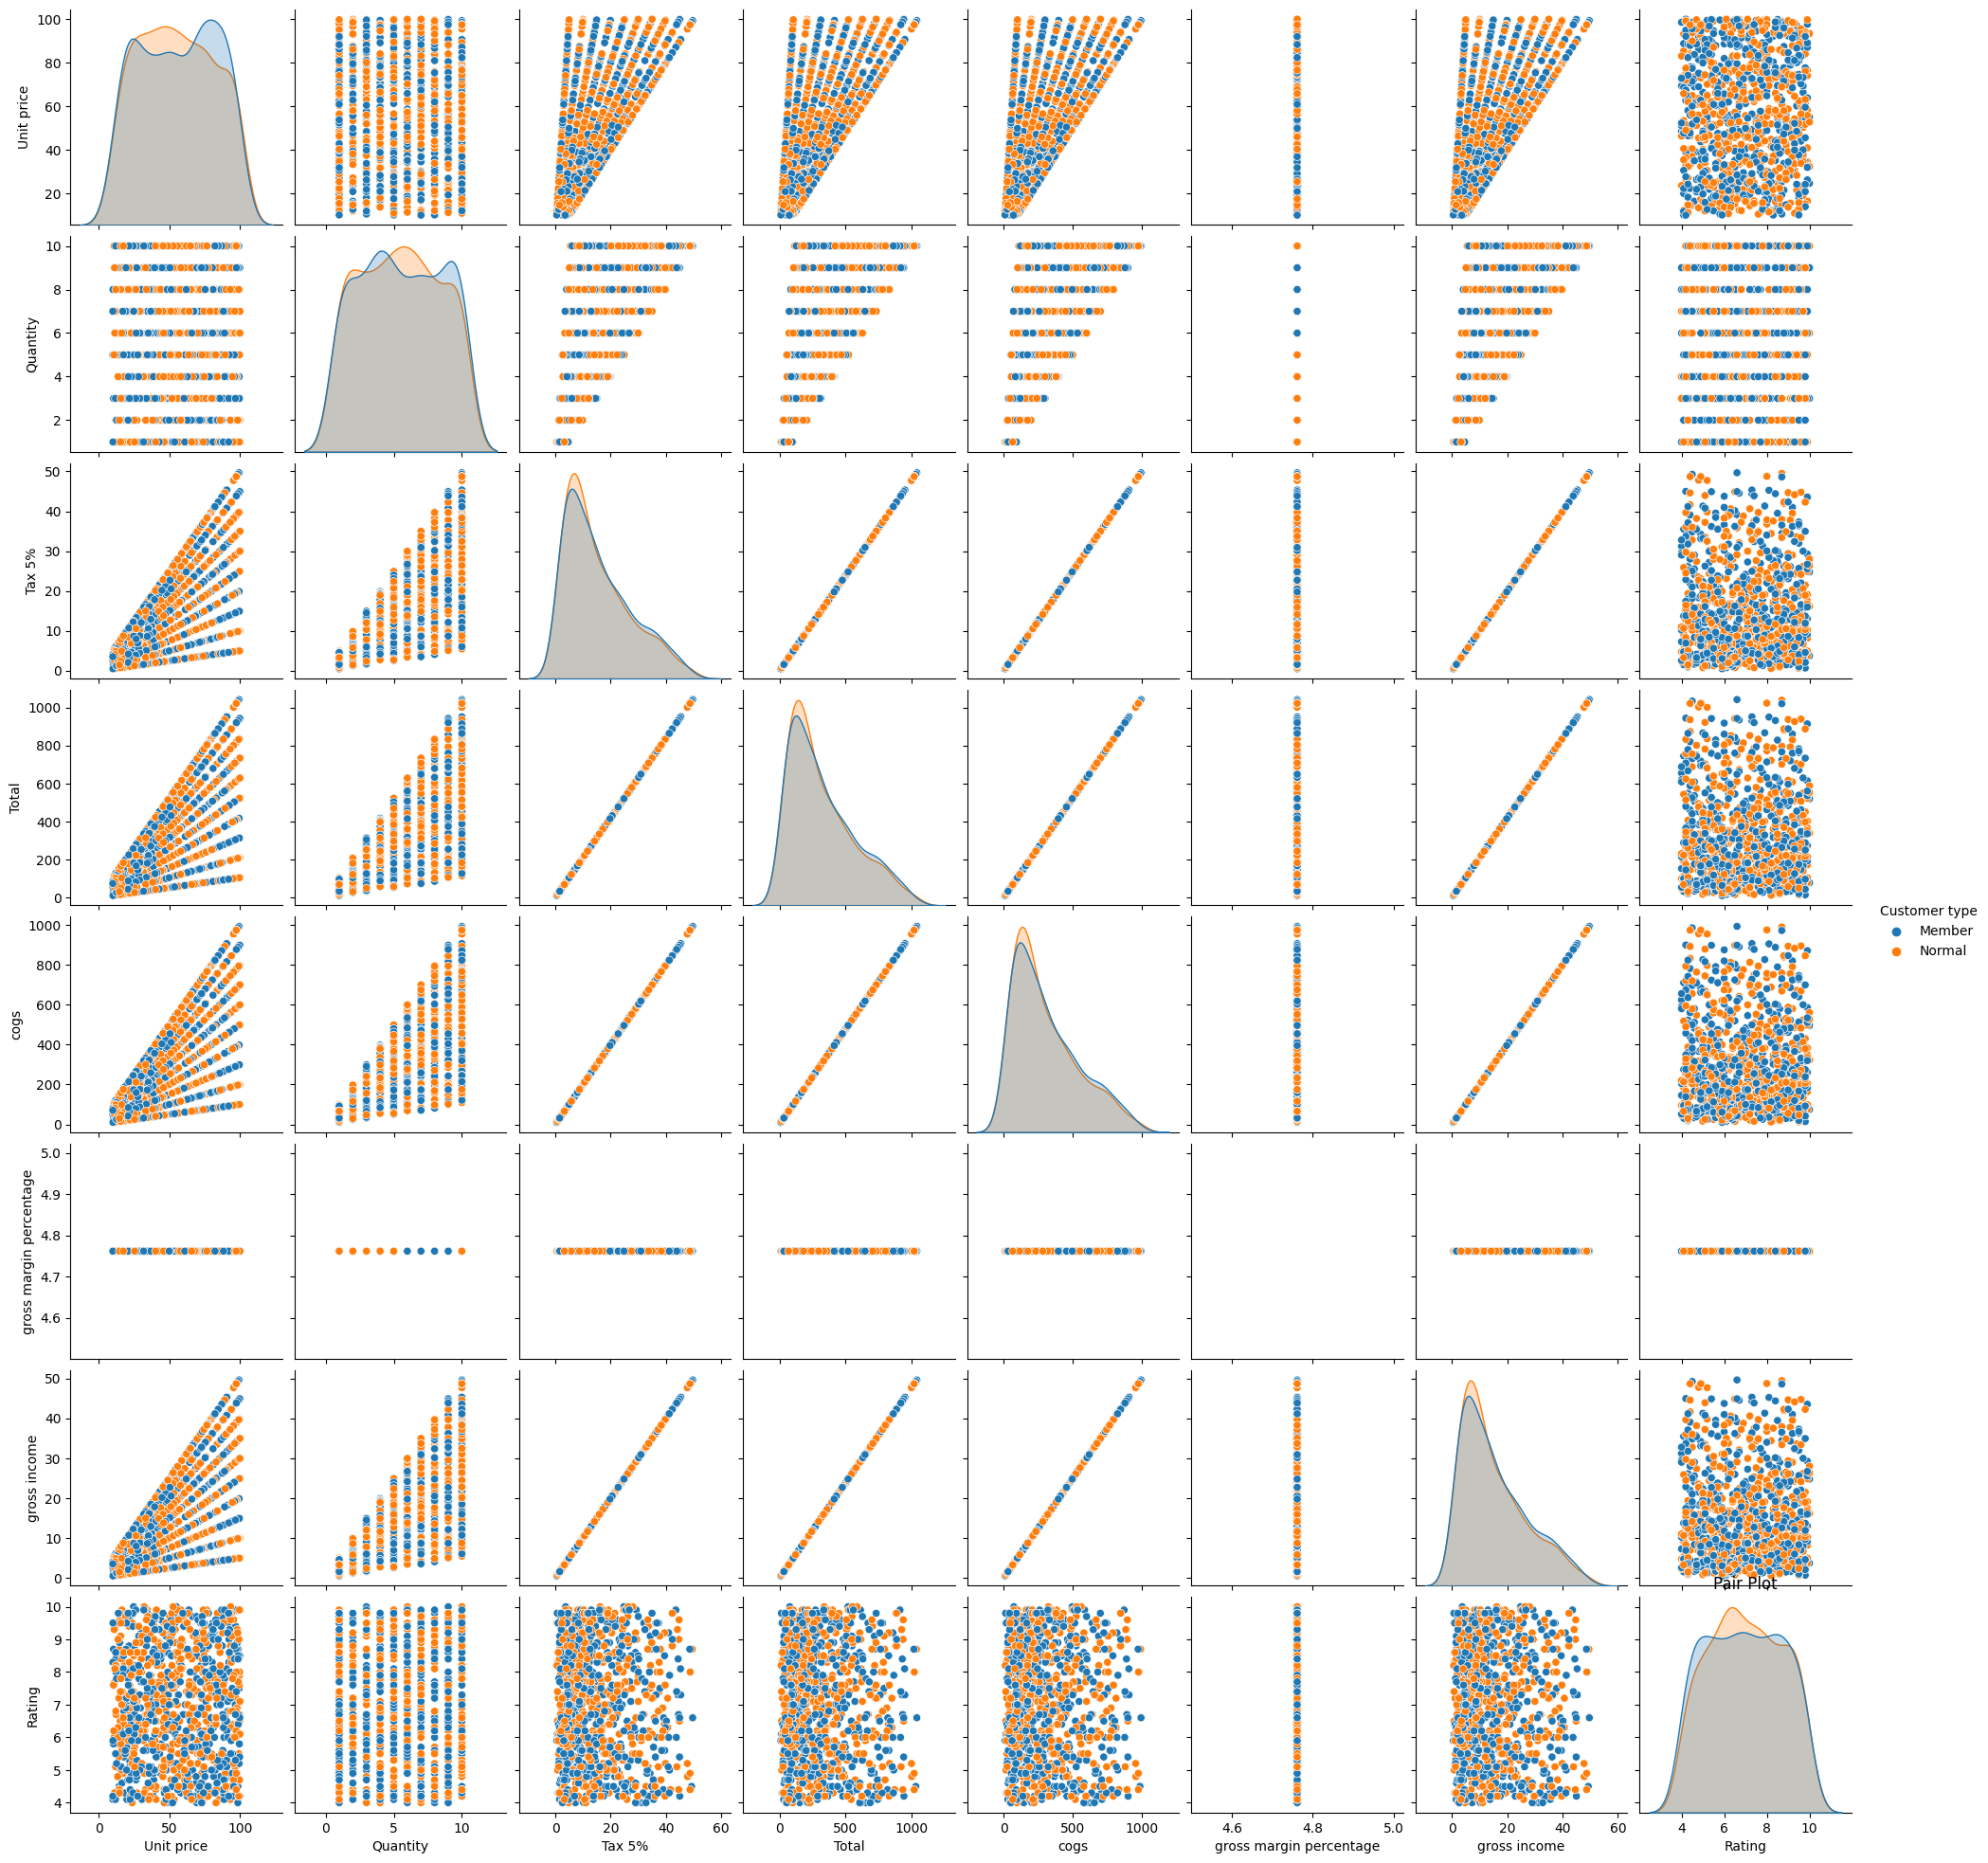

In [12]:
#Pairplot:can provide scatter plots of numerical variables against each other, along with histograms on the diagonal.
sns.pairplot(df, hue='Customer type', diag_kind='kde')
plt.title('Pair Plot')
plt.show()


# **Transformations**

### **Normalization**

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
numerical_attributes = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']
df[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])


In [15]:
print(df)

      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387   
2        Home and lifestyle    0.403316  0.66666

### **One Hot encoding**

In [16]:
data = pd.get_dummies(df, columns=['Branch', 'Customer type', 'Gender', 'Product line', 'Payment'])
print(data)


      Invoice ID        City  Unit price  Quantity    Tax 5%     Total  \
0    750-67-8428  Trivendrum    0.718847  0.666667  0.521616  0.521616   
1    226-31-3081   Bangalore    0.057855  0.444444  0.067387  0.067387   
2    631-41-3108  Trivendrum    0.403316  0.666667  0.319628  0.319628   
3    123-19-1176  Trivendrum    0.535603  0.777778  0.463549  0.463549   
4    373-73-7910  Trivendrum    0.848131  0.666667  0.604377  0.604377   
..           ...         ...         ...       ...       ...       ...   
995  233-67-5758   Bangalore    0.336782  0.000000  0.030707  0.030707   
996  303-96-2227     Chennai    0.971295  1.000000  0.980465  0.980465   
997  727-02-1313  Trivendrum    0.242101  0.000000  0.022049  0.022049   
998  347-56-2442  Trivendrum    0.620160  0.000000  0.056622  0.056622   
999  849-09-3807  Trivendrum    0.870717  0.666667  0.618835  0.618835   

           Date   Time      cogs  gross margin percentage  ...  Gender_Male  \
0    05-01-2019  13:08  0.521616

### **Date Transformation**

In [39]:
#Extracts useful features from the 'Date' column, such as day of the week, month, or year.
df['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df)

      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  ...  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616  ...   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387  ...   
2        Home and lifestyle    0.

# **Feature Engineering:Generating KPI's**

In [17]:
#Sales per Customer
df['Sales_per_Customer'] = df['Total'] / df.groupby('Customer type')['Invoice ID'].transform('count')
print(df)



      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387   
2        Home and lifestyle    0.403316  0.66666

In [18]:
#Average Rating per Product Line
average_rating_per_line = df.groupby('Product line')['Rating'].mean().reset_index()
average_rating_per_line.rename(columns={'Rating': 'Avg_Rating_per_Line'}, inplace=True)
data = df.merge(average_rating_per_line, on='Product line', how='left')


In [19]:
print(data)

      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387   
2        Home and lifestyle    0.403316  0.66666

In [32]:
#Gender Ratio: Ratio of male:female in each branch
gender_ratio = df.groupby(['Branch', 'Gender'])['Invoice ID'].count().unstack()
gender_ratio['Gender_Ratio'] = gender_ratio['Female'] / gender_ratio['Male']
df = df.merge(gender_ratio['Gender_Ratio'], left_on='Branch', right_index=True, how='left')


In [33]:
print(df)

      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  ...  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616  ...   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387  ...   
2        Home and lifestyle    0.

In [34]:
#Average Sales per Product Category: Average sales amount for each product category.
average_sales_per_category = df.groupby('Product line')['Total'].mean().reset_index()
average_sales_per_category.rename(columns={'Total': 'Avg_Sales_per_Category'}, inplace=True)
df = df.merge(average_sales_per_category, on='Product line', how='left')


In [35]:
print(df)

      Invoice ID Branch        City Customer type  Gender  \
0    750-67-8428      A  Trivendrum        Member  Female   
1    226-31-3081      C   Bangalore        Normal  Female   
2    631-41-3108      A  Trivendrum        Normal    Male   
3    123-19-1176      A  Trivendrum        Member    Male   
4    373-73-7910      A  Trivendrum        Normal    Male   
..           ...    ...         ...           ...     ...   
995  233-67-5758      C   Bangalore        Normal    Male   
996  303-96-2227      B     Chennai        Normal  Female   
997  727-02-1313      A  Trivendrum        Member    Male   
998  347-56-2442      A  Trivendrum        Normal    Male   
999  849-09-3807      A  Trivendrum        Member  Female   

               Product line  Unit price  Quantity    Tax 5%     Total  ...  \
0         Health and beauty    0.718847  0.666667  0.521616  0.521616  ...   
1    Electronic accessories    0.057855  0.444444  0.067387  0.067387  ...   
2        Home and lifestyle    0.

# **Visualisation**

### **Linear Regression**

Mean Squared Error: 2.782953723311865e-33


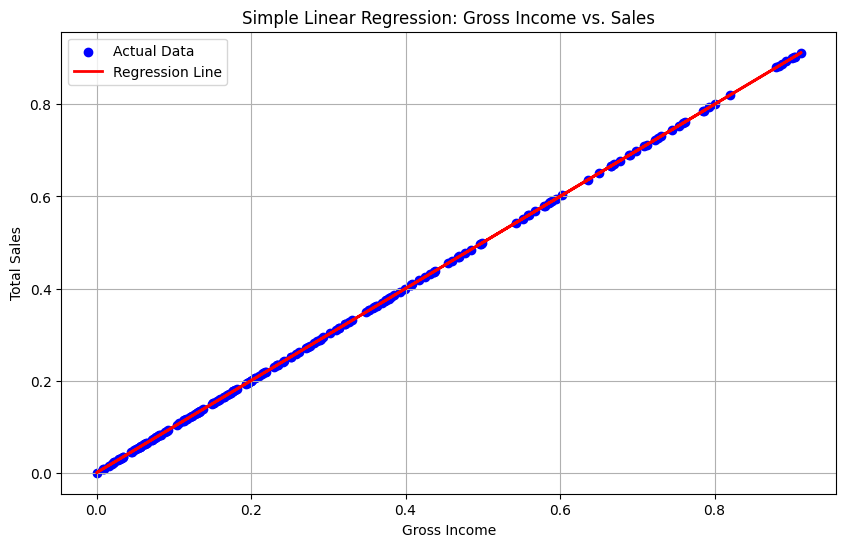

In [41]:
# Prepare the data
X = data[['gross income']]  # Feature (independent variable)
y = data['Total']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Visualize the regression line and data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Gross Income vs. Sales')
plt.xlabel('Gross Income')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

### **Multiple Linear Regression**

RMSE: 1.0449171331692564e-16


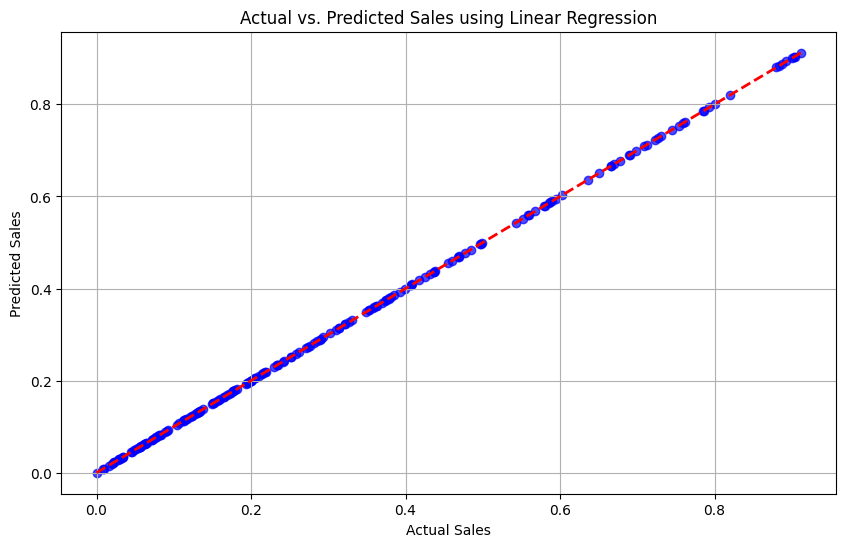

In [44]:
# Selecting independent variables
X = data[['Quantity', 'Tax 5%', 'cogs']]

# Dependent variable
y = data['Total']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Scatter plot of actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Sales using Linear Regression')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()